# Lab 3: Regression Assignment
**Name:** Prashant Khadka  
**Class:** CPSMA-3933-01  
**Instructor:** Nicholas Jacob  
**Date:** 2025-09-29 

In [4]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [3]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)



### Linear Regression

#### Linear Regression for goals vs points

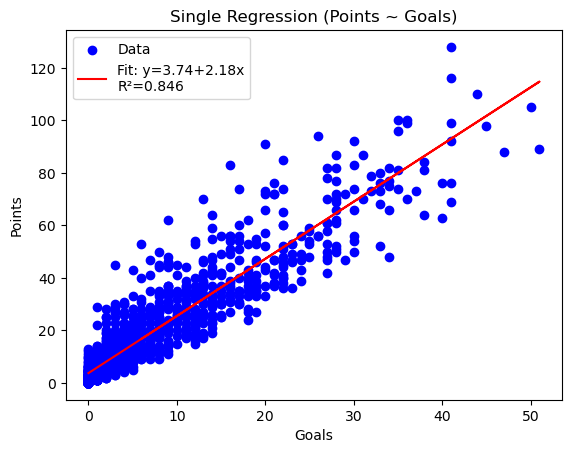

In [14]:
goals = np.array(df.G)

# Fit regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(goals, y)
y_pred = intercept + slope * goals

# Plot
plt.scatter(goals, y, color="blue", label="Data")
plt.plot(goals, y_pred, color="red", label=f"Fit: y={intercept:.2f}+{slope:.2f}x\nR²={r_value**2:.3f}")
plt.xlabel("Goals")
plt.ylabel("Points")
plt.title("Single Regression (Points ~ Goals)")
plt.legend()
plt.show()

Although the above linear regression captures the correlation between goals and points, there is some variance as seen in the graph since only goals do not completely make up the points. Since the data for assists is not taken into account in this regression, this causes the variance.

#### Multiple regression for goals and assists vs points

Intercept: 7.105427357601002e-15
Coefficients: [1. 1.]
R² score: 1.0


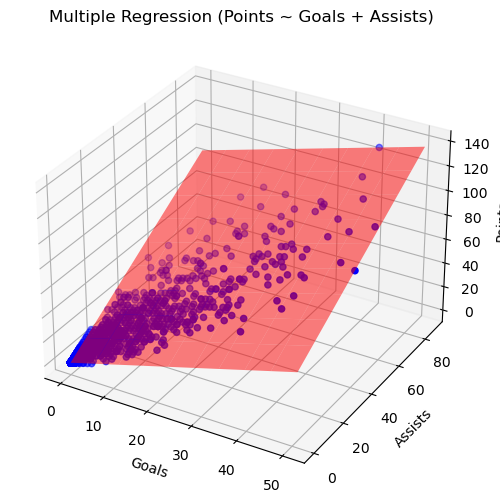

In [19]:
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

X = df[['G','A']].values   # goals + assists
y = df['PTS'].values

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² score:", model.score(X, y))

y_pred = model.predict(X)

# 3D Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y, color="blue", label="Data")
ax.set_xlabel("Goals")
ax.set_ylabel("Assists")
ax.set_zlabel("Points")
ax.set_title("Multiple Regression (Points ~ Goals + Assists)")

# Regression plane
g_range = np.linspace(X[:,0].min(), X[:,0].max(), 10)
a_range = np.linspace(X[:,1].min(), X[:,1].max(), 10)
g_grid, a_grid = np.meshgrid(g_range, a_range)
X_grid = np.c_[g_grid.ravel(), a_grid.ravel()]
p_grid = model.predict(X_grid).reshape(g_grid.shape)

ax.plot_surface(g_grid, a_grid, p_grid, alpha=0.5, color="red")

plt.show()


In this case the intercept is close to 0 and the coefficients are both 1. The fit is exact because points is always equal to the sum of goals and assists. Hence, the model fits perfectly.

### Logistic Regression

In [45]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [46]:
from sklearn.linear_model import LogisticRegression

df['Death1'].map({'YES': 1, 'NO': 0}).fillna(0).astype(int)
x = df[['Year', 'Appearances', 'Gender']].copy()
x['Gender'] = (x['Gender'] == 'MALE').astype(int)  # Encode gender
y = df['Death1']

model = LogisticRegression()
model.fit(x,y)

character = "Thor"
char = df[df['Name/Alias'].str.contains(character, case=False, na=False)].iloc[0]

char_features = [[char['Year'], char['Appearances'], 1 if char['Gender']=="MALE" else 0]]
prob = model.predict_proba(char_features)[0,1]

print(f"Predicted probability that {char['Name/Alias']} dies first (Death1): {prob:.3f}")

Predicted probability that Thor Odinson dies first (Death1): 0.723


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Find your own Regresssion

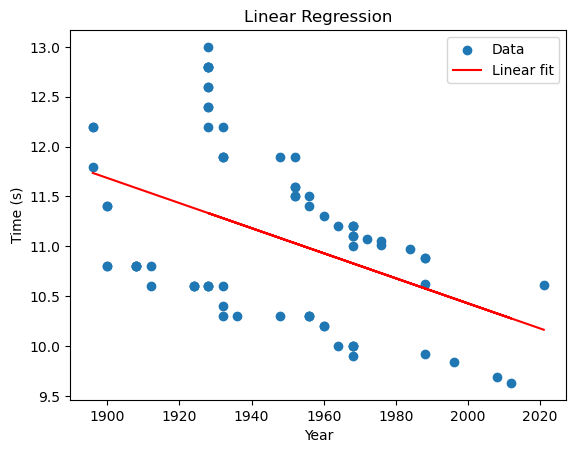

Linear model coefficients: slope=-0.0126, intercept=35.58


In [27]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
df.head()

X = df['Games'].values.reshape(-1,1)
y = df['Time'].values

lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_lin_pred, color='red', label="Linear fit")
plt.xlabel("Year")
plt.ylabel("Time (s)")
plt.title("Linear Regression")
plt.legend()
plt.show()

print(f"Linear model coefficients: slope={lin_model.coef_[0]:.4f}, intercept={lin_model.intercept_:.2f}")


In [28]:
year_to_predict = 2024
time_pred = lin_model.predict([[year_to_predict]])  # Note double brackets
print(f"Predicted 100m time for {year_to_predict}: {time_pred[0]:.2f} seconds")

Predicted 100m time for 2024: 10.13 seconds


In [30]:
year_to_predict = 2300
time_pred = lin_model.predict([[year_to_predict]])  # Note double brackets
print(f"Predicted 100m time for {year_to_predict}: {time_pred[0]:.2f} seconds")

Predicted 100m time for 2300: 6.65 seconds


Although there is a general decrease in the time as the years increases, it does not really fit with the linear regression model. If we go with the same rate of decrease, it is reasonable for 2024 at 10.13 seconds but it goes to likely impossibly small value of 6.65 seconds for 2300. So **linear regression model** does not fit this.

In [31]:
y_log = np.array(df.Time.apply(lambda x: np.log(x)))

In [32]:
from scipy import stats

stats.linregress(df.Games,y)

LinregressResult(slope=-0.01257779170363551, intercept=35.58339288277961, rvalue=-0.4312831851685421, pvalue=0.00010043512623063224, stderr=0.003058699634517884, intercept_stderr=5.9514955942794865)

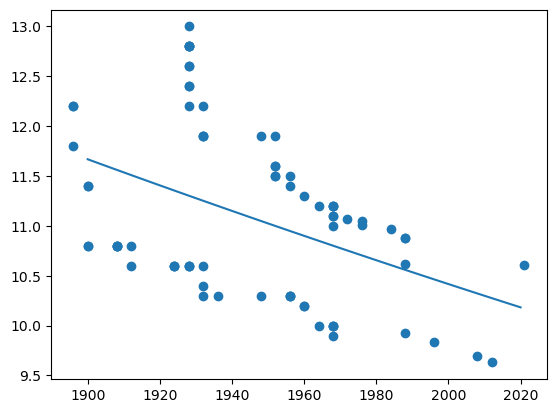

In [33]:
def predict(x):
  return np.exp(-0.001134595*x+4.6125913)

xs = np.linspace(1900,2020,100)
ys = predict(xs)

plt.plot(xs,ys)
plt.scatter(df.Games,df.Time)

In [35]:
year_to_predict = 2024
time_pred = predict(year_to_predict)  # Note double brackets
print(f"Predicted 100m time for {year_to_predict}: {time_pred:.2f} seconds")

Predicted 100m time for 2024: 10.14 seconds


In [36]:
year_to_predict = 2300
time_pred = predict(year_to_predict)  # Note double brackets
print(f"Predicted 100m time for {year_to_predict}: {time_pred:.2f} seconds")

Predicted 100m time for 2300: 7.41 seconds


Although slope is similar with exponential, it still goes down lower than likely possible for 2300. **Exponential Regression** also does not fit well with this dataset.

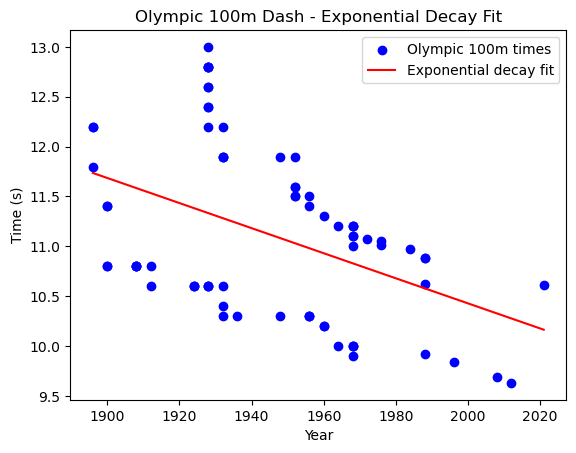

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

X = df['Games'].values
y = df['Time'].values

# Define exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(b * (x - X.min())) + c  # normalize years to start from 0

# Fit exponential decay
popt, _ = curve_fit(exp_decay, X, y, p0=(10, -0.01, 9))

# Generate predictions for plotting
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = exp_decay(X_fit, *popt)

# Plot data and regression
plt.scatter(X, y, color='blue', label='Olympic 100m times')
plt.plot(X_fit, y_fit, color='red', label='Exponential decay fit')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic 100m Dash - Exponential Decay Fit')
plt.legend()
plt.show()


In [38]:
year_to_predict = 2300
time_pred = exp_decay(year_to_predict, *popt)  # Note double brackets
print(f"Predicted 100m time for {year_to_predict}: {time_pred:.2f} seconds")

Predicted 100m time for 2300: 6.66 seconds


Even with exponential decay, using just the time still does not fit well and provides a very low estimate for 2300. This seems like it needs more than just the year to find a correlation. If we consider men and women times in different bins, this might follow a better fit.

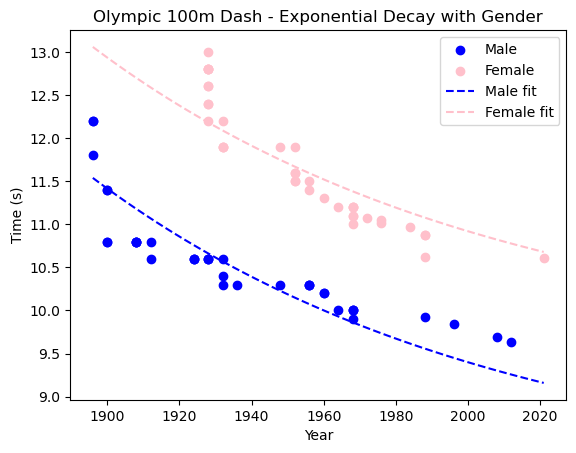

Predicted 100m time for 2024 (MALE): 9.13 s
Predicted 100m time for 2024 (FEMALE): 10.65 s
Predicted 100m time for 2300 (MALE): 8.08 s
Predicted 100m time for 2300 (FEMALE): 9.60 s


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Encode gender: 0 = Male, 1 = Female
df['Gender_bin'] = (df['Gender'].str.upper() == 'WOMEN').astype(int)

X_year = df['Games'].values
X_gender = df['Gender_bin'].values
y = df['Time'].values

# Extended exponential decay model with additive gender effect
def exp_decay_gender(x, a, b, c, d):
    year, gender = x
    return a * np.exp(b * (year - X_year.min())) + c + d * gender

# Fit curve using curve_fit
popt, _ = curve_fit(exp_decay_gender, (X_year, X_gender), y, p0=(10, -0.01, 9, 1))

# Plot data and regression
plt.scatter(X_year[X_gender==0], y[X_gender==0], color='blue', label='Male')
plt.scatter(X_year[X_gender==1], y[X_gender==1], color='pink', label='Female')

X_fit = np.linspace(X_year.min(), X_year.max(), 100)
y_fit_male = exp_decay_gender((X_fit, np.zeros_like(X_fit)), *popt)
y_fit_female = exp_decay_gender((X_fit, np.ones_like(X_fit)), *popt)

plt.plot(X_fit, y_fit_male, color='blue', linestyle='--', label='Male fit')
plt.plot(X_fit, y_fit_female, color='pink', linestyle='--', label='Female fit')

plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic 100m Dash - Exponential Decay with Gender')
plt.legend()
plt.show()

# Predict for a specific year and gender
years_to_predict = [2024, 2300]

# Loop over years and genders
for year in years_to_predict:
    for gender_str in ['MALE', 'FEMALE']:
        gender_bin = 1 if gender_str == 'FEMALE' else 0
        predicted_time = exp_decay_gender((year, gender_bin), *popt)
        print(f"Predicted 100m time for {year} ({gender_str}): {predicted_time:.2f} s")


Although this also seems lower than humanly possible, it seems to be much closer to the record times than the other models.